This is a toy example of the use of Mapper algorithm. We will generate two concentric cycles and run the mapper on them. As a filtering function we will select projection to the second coordinate, as a colouring function, projection to the first one. Clustering method will be DBSCAN with some more or less random parameters. 

In [1]:
import kmapper as km
from kmapper import jupyter 
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [2]:
import kmapper as km
from sklearn import datasets
data, labels = datasets.make_circles(n_samples=5000, noise=0.03, factor=0.3)

# Initialize
mapper = km.KeplerMapper(verbose=1)
projected_data = data[:,1]
colouring = data[:,0]

KeplerMapper(verbose=1)


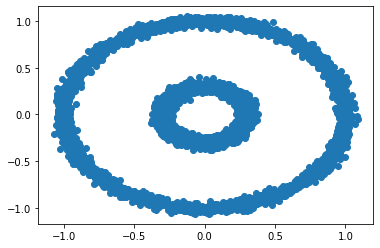

In [3]:
#Here is our dataset:
plot = plt.scatter( data[:,0],data[:,1] )

In [4]:
graph = mapper.map(projected_data,data,
                      clusterer=sklearn.cluster.DBSCAN(eps=0.3, min_samples=15),
                      cover=km.Cover(20, 0.3))

# Visualize it
#N.B. if your keppele mapper version is <= 1.4.1 you do want the line color_function_name='placeholder_name'
#commented. For higher versions, please uncomment this line. For some reason kepler mapper do not have backward 
#compatibility here. 
html = mapper.visualize(graph, path_html="concentric_circles_km.html",color_function=colouring,
                 title="make_circles(n_samples=5000, noise=0.03, factor=0.3)"
                 #color_function_name='placeholder_name'
                 )

jupyter.display(path_html="concentric_circles_km.html")

Mapping on data shaped (5000, 2) using lens shaped (5000,)

Creating 20 hypercubes.

Created 46 edges and 46 nodes in 0:00:00.154649.
Wrote visualization to: concentric_circles_km.html


/home/pawel/anaconda3/lib/python3.8/site-packages/IPython/core/display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


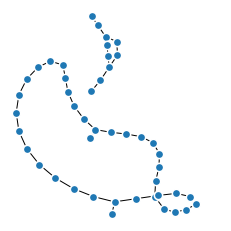

In [5]:
#Here is an alternative way of visualizing the mapper graph with mathplotlib:
km.draw_matplotlib(graph, layout="spring")
plt.show()